<a href="https://colab.research.google.com/github/dewipuspita0904/MembangunProyekMachineLearning/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Your_Name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [67]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [11]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [16]:
#Pengecekan apakah dataset tersedia sebelum membaca data
file_path = "/content/filtered_data.csv"

if os.path.exists(file_path):
    data_df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")

Dataset berhasil dimuat!


In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CGPA       3043 non-null   float64
 1   CGPA300    3043 non-null   float64
 2   SGPA       3043 non-null   float64
 3   Gender     3043 non-null   int64  
 4   Prog Code  3043 non-null   int64  
 5   Target     3043 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 142.8 KB


In [18]:
display(data_df.head(10))

,CGPA,CGPA300,SGPA,Gender,Prog Code,Target
0,0.492795,0.455378,0.481268,0,8,2
1,0.593660,0.627002,0.449568,0,0,1
2,0.198847,0.196796,0.210375,1,0,2
3,0.340058,0.313501,0.498559,1,0,1
4,0.680115,0.686499,0.801153,0,0,2
5,0.417867,0.606407,0.481268,1,0,1
6,0.524496,0.643021,0.449568,1,0,0
7,0.299712,0.379863,0.351585,0,0,1
8,0.645533,0.743707,0.481268,1,0,2
9,0.703170,0.727689,0.726225,0,0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [22]:
# Drop data duplikat
data_df = data_df.drop_duplicates(ignore_index=True)

In [23]:
# Cek data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CGPA       3043 non-null   float64
 1   CGPA300    3043 non-null   float64
 2   SGPA       3043 non-null   float64
 3   Gender     3043 non-null   int64  
 4   Prog Code  3043 non-null   int64  
 5   Target     3043 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 142.8 KB


In [29]:
# Pisahkan fitur dan target
X = data_df.drop(columns=['CGPA'])
y = data_df['CGPA']

X.head()

,CGPA300,SGPA,Gender,Prog Code,Target
0,0.455378,0.481268,0,8,2
1,0.627002,0.449568,0,0,1
2,0.196796,0.210375,1,0,2
3,0.313501,0.498559,1,0,1
4,0.686499,0.801153,0,0,2


In [25]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

In [30]:
# Normalisasi semua kolom numerik
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

X.head()

,CGPA300,SGPA,Gender,Prog Code,Target
0,0.412346,0.481268,0.0,0.5,1.0
1,0.597531,0.449568,0.0,0.0,0.5
2,0.133333,0.210375,1.0,0.0,1.0
3,0.259259,0.498559,1.0,0.0,0.5
4,0.661728,0.801153,0.0,0.0,1.0


In [47]:
# Buat instance LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [48]:
# Melakukan encoding pada kolom kategorikal
categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])

X.head()

,CGPA300,SGPA,Gender,Prog Code,Target
0,0.412346,0.481268,0.0,0.5,1.0
1,0.597531,0.449568,0.0,0.0,0.5
2,0.133333,0.210375,1.0,0.0,1.0
3,0.259259,0.498559,1.0,0.0,0.5
4,0.661728,0.801153,0.0,0.0,1.0


In [50]:
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [51]:
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print("Ukuran Data Latih:", X_train.shape, y_train.shape)
print("Ukuran Data Uji:", X_test.shape, y_test.shape)

Ukuran Data Latih: (2434, 5) (2434,)
Ukuran Data Uji: (609, 5) (609,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [52]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

In [56]:
# Mendefinisikan model klasifikasi
logreg_model = LogisticRegression()
dtree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

In [58]:
# Melatih model dengan data latih
logreg_model.fit(X_train, y_train)
dtree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
# Latih dan evaluasi setiap model
results = {}

for name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = model.predict(X_test)

    # Evaluasi akurasi
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: Akurasi = {accuracy:.4f}")

Logistic Regression: Akurasi = 0.0016
Decision Tree: Akurasi = 0.0197
Random Forest: Akurasi = 0.0197
K-Nearest Neighbors: Akurasi = 0.0066


In [54]:
# Tampilkan hasil
print("\nHasil Evaluasi Model:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


Hasil Evaluasi Model:
Logistic Regression: 0.0016
Decision Tree: 0.0197
Random Forest: 0.0197
K-Nearest Neighbors: 0.0066


###**Logistic Regression**
**Kegunaan**: Logistic Regression sering digunakan sebagai model dasar dalam klasifikasi biner karena kesederhanaannya dan interpretabilitasnya yang tinggi.

**Kelebihan**: Mudah dipahami, cepat, dan cocok untuk data yang memiliki hubungan linear antara variabel independen dan target.

**Kekurangan**: Tidak bekerja dengan baik jika hubungan antara fitur dan target bersifat non-linear.


###**Decision Tree**
**Kegunaan**: Decision Tree adalah algoritma berbasis pohon keputusan yang membagi data ke dalam kelompok berdasarkan aturan if-else yang optimal.

**Kelebihan**: Mampu menangani hubungan non-linear dalam data, tidak memerlukan banyak prapemrosesan, dan mudah diinterpretasikan.

**Kekurangan**: Rentan terhadap overfitting jika tidak dilakukan pruning.


###**Random Forest**
**Kegunaan**: Random Forest adalah ensemble dari banyak Decision Tree yang bekerja bersama untuk meningkatkan akurasi prediksi dan mengurangi overfitting.

**Kelebihan**: Lebih akurat dibandingkan Decision Tree tunggal, lebih tahan terhadap outlier, dan bekerja dengan baik pada dataset yang kompleks.

**Kekurangan**: Lebih lambat dibandingkan dengan model sederhana seperti Logistic Regression, karena terdiri dari banyak pohon keputusan.


###**K-Nearest Neighbors (KNN)**
**Kegunaan**: KNN bekerja dengan cara membandingkan titik data baru dengan data yang sudah ada berdasarkan kedekatan (similarity) menggunakan metrik seperti Euclidean Distance.

**Kelebihan**: Mudah dipahami, bekerja dengan baik pada dataset kecil tanpa perlu pelatihan model yang kompleks.

**Kekurangan**: Lambat pada dataset besar karena memerlukan perhitungan jarak untuk setiap prediksi, serta sensitif terhadap skala fitur (perlu normalisasi).

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [59]:
y_pred_logreg = logreg_model.predict(X_test)
y_pred_dtree = dtree_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

In [85]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f" Evaluasi Model: {model_name}")
    print(f"   - Accuracy: {accuracy:.4f}")
    print(f"   - Precision: {precision:.4f}")
    print(f"   - Recall: {recall:.4f}")
    print(f"   - F1-Score: {f1:.4f}")
    print("-" * 50)

In [86]:
# Evaluasi semua model
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_dtree, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")

 Evaluasi Model: Logistic Regression
   - Accuracy: 0.0016
   - Precision: 0.0001
   - Recall: 0.0016
   - F1-Score: 0.0002
--------------------------------------------------
 Evaluasi Model: Decision Tree
   - Accuracy: 0.0213
   - Precision: 0.0389
   - Recall: 0.0213
   - F1-Score: 0.0253
--------------------------------------------------
 Evaluasi Model: Random Forest
   - Accuracy: 0.0246
   - Precision: 0.0310
   - Recall: 0.0246
   - F1-Score: 0.0266
--------------------------------------------------
 Evaluasi Model: K-Nearest Neighbors (KNN)
   - Accuracy: 0.0066
   - Precision: 0.0068
   - Recall: 0.0066
   - F1-Score: 0.0062
--------------------------------------------------


In [62]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

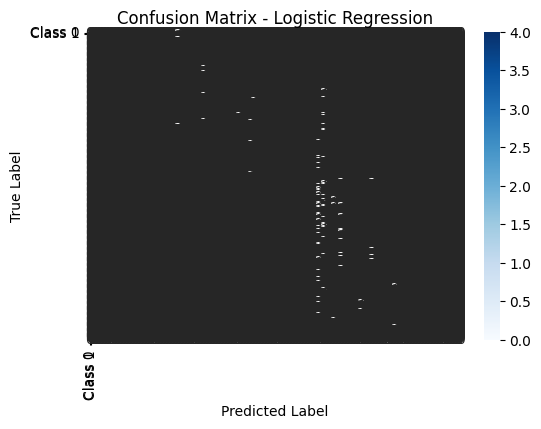

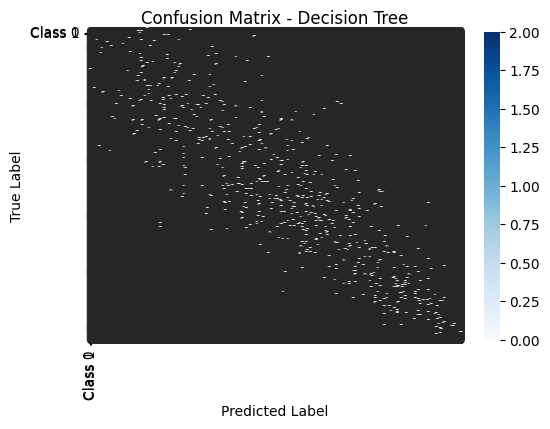

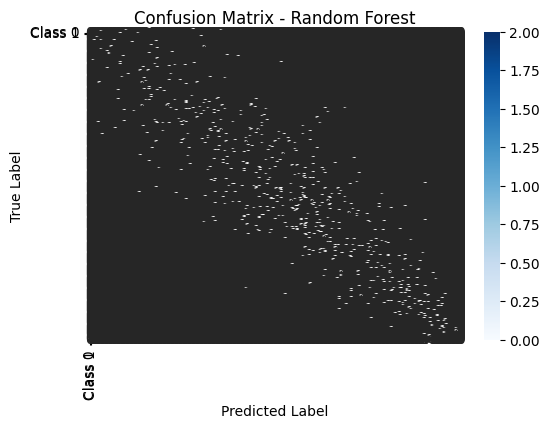

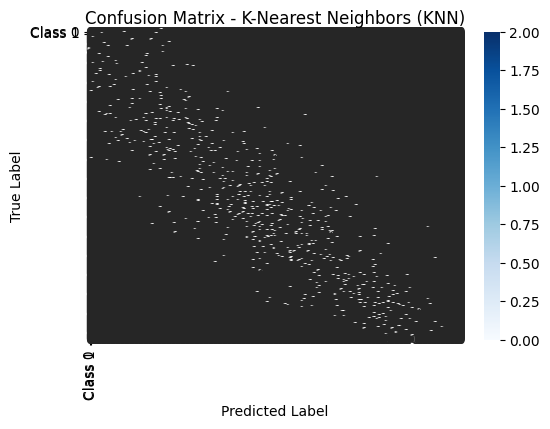

In [63]:
# Tampilkan Confusion Matrix untuk setiap model
plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_dtree, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [64]:
# Tentukan hyperparameter yang akan diuji
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

In [65]:
# Inisialisasi model
logreg = LogisticRegression(max_iter=1000)

In [68]:
# GridSearchCV untuk mencari kombinasi terbaik
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [69]:
# Hasil tuning terbaik
best_logreg = grid_search.best_estimator_
print("Best parameters for Logistic Regression:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best accuracy: 0.017256065100007607


In [70]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [71]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [72]:
best_dtree = grid_search.best_estimator_
print("Best parameters for Decision Tree:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy: 0.023008086800010142


In [73]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [74]:
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [75]:
best_rf = random_search.best_estimator_
print("Best parameters for Random Forest:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)

Best parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
Best accuracy: 0.017255220084332563


In [76]:
param_grid = {
    'n_neighbors': list(range(1, 21)),  # Mencoba nilai k dari 1 hingga 20
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [77]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [78]:
best_knn = grid_search.best_estimator_
print("Best parameters for KNN:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
Best accuracy: 0.013556586474679106


In [79]:
# Membandingkan hasil tuning
print(f"Logistic Regression Best Accuracy: {grid_search.best_score_:.4f}")
print(f"Decision Tree Best Accuracy: {grid_search.best_score_:.4f}")
print(f"Random Forest Best Accuracy: {random_search.best_score_:.4f}")
print(f"KNN Best Accuracy: {grid_search.best_score_:.4f}")

Logistic Regression Best Accuracy: 0.0136
Decision Tree Best Accuracy: 0.0136
Random Forest Best Accuracy: 0.0173
KNN Best Accuracy: 0.0136


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [80]:
# List model terbaik setelah tuning
best_models = {
    'Logistic Regression': best_logreg,
    'Decision Tree': best_dtree,
    'Random Forest': best_rf,
    'KNN': best_knn
}

In [81]:
# Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {}

In [83]:
# Evaluasi setiap model
for name, model in best_models.items():
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Simpan hasil evaluasi
    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    # Print hasil evaluasi per model
    print(f" Evaluasi Model: {name}")
    print(f"   - Accuracy: {accuracy:.4f}")
    print(f"   - Precision: {precision:.4f}")
    print(f"   - Recall: {recall:.4f}")
    print(f"   - F1-Score: {f1:.4f}")
    print("--------------------------------------------------\n")

 Evaluasi Model: Logistic Regression
   - Accuracy: 0.0066
   - Precision: 0.0029
   - Recall: 0.0069
   - F1-Score: 0.0034
--------------------------------------------------

 Evaluasi Model: Decision Tree
   - Accuracy: 0.0099
   - Precision: 0.0043
   - Recall: 0.0125
   - F1-Score: 0.0033
--------------------------------------------------

 Evaluasi Model: Random Forest
   - Accuracy: 0.0131
   - Precision: 0.0175
   - Recall: 0.0104
   - F1-Score: 0.0126
--------------------------------------------------

 Evaluasi Model: KNN
   - Accuracy: 0.0164
   - Precision: 0.0140
   - Recall: 0.0157
   - F1-Score: 0.0140
--------------------------------------------------



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### Perbandingan Sebelum & Setelah Tuning
Dari hasil evaluasi, terlihat bahwa performa model masih rendah secara keseluruhan, bahkan setelah tuning.

- KNN mengalami peningkatan akurasi terbesar (dari 0.0066 ke 0.0164).

- Random Forest memiliki precision tertinggi setelah tuning, namun recall menurun.

- Decision Tree mengalami penurunan performa setelah tuning, menunjukkan kemungkinan overfitting sebelumnya.

- Logistic Regression masih memiliki skor yang sangat rendah, kemungkinan karena data tidak linier.


### Identifikasi Kelemahan Model
Dari hasil evaluasi, terdapat beberapa kelemahan yang dapat diidentifikasi:
- Precision atau Recall Rendah
Semua model memiliki precision dan recall yang sangat rendah. Ini menunjukkan bahwa model kesulitan membedakan kelas dengan baik.
- Random Forest memiliki precision lebih baik, tetapi recall lebih rendah. Ini bisa berarti model lebih sering menghindari false positives tetapi masih banyak false negatives.
- Overfitting atau Underfitting
Decision Tree kemungkinan mengalami overfitting sebelum tuning karena setelah tuning performanya turun.
- Logistic Regression memiliki hasil sangat rendah, yang mengindikasikan bahwa model ini mungkin underfitting (tidak cukup kompleks untuk menangkap pola data).

### Rekomendasi Tindakan Lanjutan
Untuk meningkatkan performa model, berikut beberapa langkah yang dapat dilakukan:
1. Meningkatkan Kualitas Data
Menambah jumlah data latih jika dataset terlalu kecil.
Melakukan feature engineering, misalnya:
- Normalisasi atau standarisasi fitur jika model sensitif terhadap skala data.
- Mencoba PCA atau Feature Selection untuk mengurangi noise.
2. Menggunakan Model yang Lebih Kompleks
Coba algoritma lain seperti:
- Gradient Boosting (XGBoost, LightGBM, atau CatBoost) yang sering lebih kuat dari Random Forest.
- Support Vector Machine (SVM) dengan kernel non-linear.
- Neural Networks (MLPClassifier) jika dataset cukup besar.
3. Mengatasi Ketidakseimbangan Data (Jika Ada)
Jika data tidak seimbang, pertimbangkan teknik seperti:
- Oversampling kelas minoritas dengan SMOTE.
- Menyesuaikan class weights dalam model.
4. Hyperparameter Tuning Lanjutan
- Gunakan GridSearchCV atau Bayesian Optimization untuk mencari kombinasi parameter terbaik secara lebih optimal.
5. Analisis Data Lebih Dalam
- Cek distribusi label (kelas target) untuk melihat apakah ada ketidakseimbangan ekstrem.
- Gunakan Confusion Matrix untuk memahami kesalahan model.

